In [ ]:
!curl -LO https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   656  100   656    0     0   1935      0 --:--:-- --:--:-- --:--:--  1935
100  158M  100  158M    0     0  40.5M      0  0:00:03  0:00:03 --:--:-- 45.5M


In [ ]:
!pip3 install pixellib

     |████████████████████████████████| 71kB 4.5MB/s 
  Created wheel for imantics: filename=imantics-0.1.12-cp37-none-any.whl size=16033 sha256=b5792a3076a47e76c2845d5362ba26f777789bf076a2a60c5966f7d0b1839e91
  Stored in directory: /root/.cache/pip/wheels/73/93/1c/9e2fc52eb74441941bc76cac441ddcc2c7ad67b18e1849e62a
Successfully built imantics


In [ ]:
import pixellib
from pixellib.semantic import semantic_segmentation 

In [ ]:
segment_image = semantic_segmentation()
segment_image.load_pascalvoc_model('/content/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

In [ ]:
segment_image.segmentAsPascalvoc('/content/teste.png', output_image_name = '/content/teste_result.png')

In [ ]:
segment_image.segmentAsPascalvoc('/content/teste_1.png', output_image_name = '/content/teste_1_result.png')

In [ ]:
segment_image.segmentAsPascalvoc('/content/teste_2.png', output_image_name = '/content/teste_2_result.png')

In [ ]:
!curl -LO https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.2/mask_rcnn_coco.h5

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   625  100   625    0     0   2264      0 --:--:-- --:--:-- --:--:--  2264
100  245M  100  245M    0     0  68.6M      0  0:00:03  0:00:03 --:--:-- 85.7M


In [ ]:
import pixellib
from pixellib.instance import instance_segmentation
import cv2

In [ ]:
instance_seg = instance_segmentation()
instance_seg.load_model('/content/mask_rcnn_coco.h5')

In [ ]:
segmask, output = instance_seg.segmentImage("/content/teste.png")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [ ]:
cv2.imwrite('/content/teste_result_2.png', output)
print(output.shape)

(625, 1281, 3)


In [ ]:
segmask, output = instance_seg.segmentImage("/content/teste_1.png")
cv2.imwrite('/content/teste_1_result_2.png', output)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


True

In [ ]:
segmask, output = instance_seg.segmentImage("/content/teste_2.png")
cv2.imwrite('/content/teste_2_result_2.png', output)

True

In [ ]:
target_classes = instance_seg.select_target_classes(person=True)
segmask, output = instance_seg.segmentImage("/content/teste.png", segment_target_classes=target_classes, extract_segmented_objects=True, verbose=1)
cv2.imwrite('/content/teste_result_2.png', output)

Processing image...


True

In [ ]:
mask = segmask['masks']
mask = mask.astype(int)
mask.shape

(625, 1281, 1)

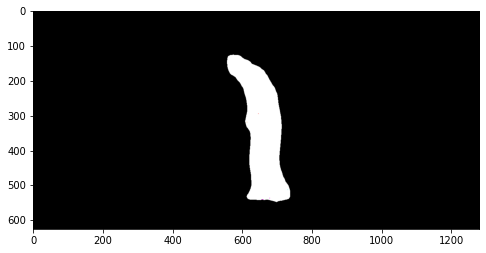

In [ ]:
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

for i in range(mask.shape[2]):
    temp = skimage.io.imread('/content/teste.png')
    for j in range(temp.shape[2]):
        temp[:,:,j] = temp[:,:,j] * mask[:,:,i]
    
    ret,th1 = cv2.threshold(temp, 0, 255, cv2.THRESH_BINARY)

    plt.figure(figsize=(8,8))
    plt.imshow(temp)
    plt.imshow(th1)